In [1]:
!pip install pillow
import os
import time
from PIL import Image

# 다운받을 이미지 url
url = "https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/dog.jpg"

# time check
start = time.time()

# curl 요청
# curl "이미지 주소" > "저장 될 이미지 파일 이름" 
os.system("curl " + url)

# 저장 된 이미지 확인
curl_img = Image.open("./dog.jpg")
img = curl_img.resize((224, 224))
img

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


FileNotFoundError: ignored

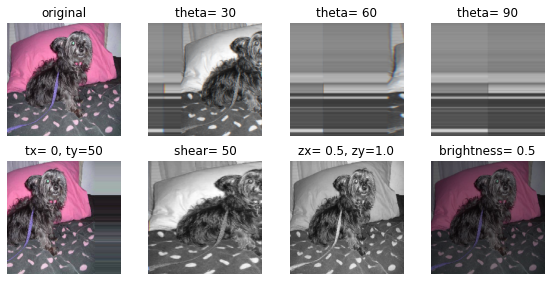

In [4]:
#chapter12
#48_01
import tensorflow as tf
from tensorflow.keras.preprocessing import image # pip install pillow
import numpy as np
import matplotlib.pyplot as plt

#1: load image
# img_path = "./drive/MyDrive/DATA/giraffe.jpg"
#img_path = "./data/dog.jpg"
img_path = "./drive/MyDrive/cats_and_dogs_small/train/dogs/dog.0.jpg"
img = image.load_img(img_path,
                     target_size=(224, 224)) #(img_height, img_width)
img = image.img_to_array(img) # (224, 224, 3)
 
#2: transform img: 3D tensor
outs = []
labels = []
outs.append(img) # original image
labels.append("original")

outs.append(image.apply_affine_transform(img, theta= 30))
labels.append("theta= 30")

outs.append(image.apply_affine_transform(img, theta= 60))
labels.append("theta= 60")

outs.append(image.apply_affine_transform(img, theta= 90))
labels.append("theta= 90")

outs.append(image.apply_affine_transform(img, tx= 0, ty=50))
labels.append("tx= 0, ty=50")

outs.append(image.apply_affine_transform(img, shear= 50))
labels.append("shear= 50")

outs.append(image.apply_affine_transform(img, zx= 0.5, zy=1.0)) # zoom
labels.append("zx= 0.5, zy=1.0")

outs.append(image.apply_brightness_shift(img, brightness= 0.5))
labels.append("brightness= 0.5")

#3: save images in outs
img_path = "/content/drive/MyDrive/cats_and_dogs_small"
for i in range(8):
    img=image.array_to_img(outs[i])
    image.save_img(img_path+str(i)+".png", img)
 
#4: display images in outs 
fig = plt.figure(figsize=(8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(outs[i].astype('uint8'))
    plt.title(labels[i])
    plt.axis("off")
    
fig.tight_layout()
plt.show() 
                                                       

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


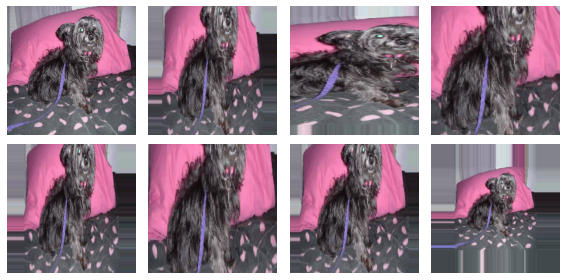

In [5]:
#48_02
import tensorflow as tf
from tensorflow.keras.preprocessing import image # pip install pillow
import numpy as np
import matplotlib.pyplot as plt

#1: load image
img_path = "/content/drive/MyDrive/cats_and_dogs_small/train/dogs/dog.0.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)  # (224, 224, 3)
 
#2:random transform img: 3D
outs = []
outs.append(img) # original image
#2-1
##for i in range(7):
##    outs.append(image.random_brightness(img, brightness_range=[0.2, 1.0]))

#2-2  
##for i in range(7):
##    outs.append(image.random_shift(img, wrg= 0.4, hrg= 0.0,
##                      row_axis=0, col_axis=1, channel_axis=2))

#2-3
##for i in range(7):
##    outs.append(image.random_shear(img, intensity=40, # intensity in degrees
##                      row_axis=0, col_axis=1, channel_axis=2))

#2-4
##for i in range(7):
##    outs.append(image.random_rotation(img, rg=20,
##                      row_axis=0, col_axis=1, channel_axis=2))

#2-5
for i in range(7):    
    outs.append(image.random_zoom(img, zoom_range= [0.4, 1.6],
                      row_axis=0, col_axis=1, channel_axis=2))
     
#3: display  
fig = plt.figure(figsize=(8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(outs[i].astype('uint8'))
    plt.axis("off")
fig.tight_layout()
plt.show() 


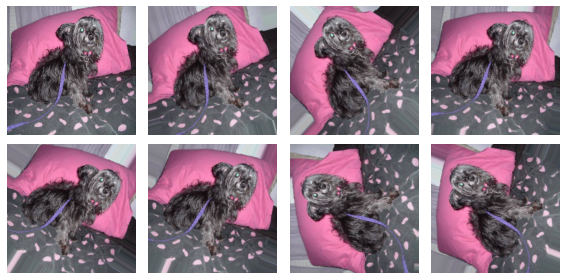

In [6]:
#49_01
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image # pip install pillow
import numpy as np
import matplotlib.pyplot as plt

#1: load image
img_path = "/content/drive/MyDrive/cats_and_dogs_small/train/dogs/dog.0.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
##img = np.expand_dims(img, axis=0)  # (1, 224, 224, 3)
img = tf.expand_dims(img, axis=0)   # (1, 224, 224, 3)

#2:random image augmentation
# ref: https://keras.io/ko/preprocessing/image/
##datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,    
##                             height_shift_range=0.1, zoom_range=0.2)
##datagen = ImageDataGenerator(width_shift_range=0.4)  #[-10, 10]
##datagen = ImageDataGenerator(height_shift_range=0.2)
##datagen = ImageDataGenerator(horizontal_flip=True)
##datagen = ImageDataGenerator(vertical_flip =True)
##datagen = ImageDataGenerator(brightness_range= [0.2, 1.0])
##datagen = ImageDataGenerator(zoom_range=0.4) #[0.6, 1.4])
datagen = ImageDataGenerator(rotation_range=90)

it = datagen.flow(img, batch_size=1)

#3: generate and display    
fig = plt.figure(figsize=(8, 4))
for i in range(8):
    if i == 0:
        batch = img # original image
    else:
        batch = it.next() # generate an image from datagen
    plt.subplot(2, 4, i + 1)  
    plt.imshow(tf.cast(batch[0], tf.uint8)) ## plt.imshow(batch[0].astype('uint8'))        
    plt.axis("off")
fig.tight_layout()
plt.show() 


170498071/170498071 [==============================] - 13s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                           

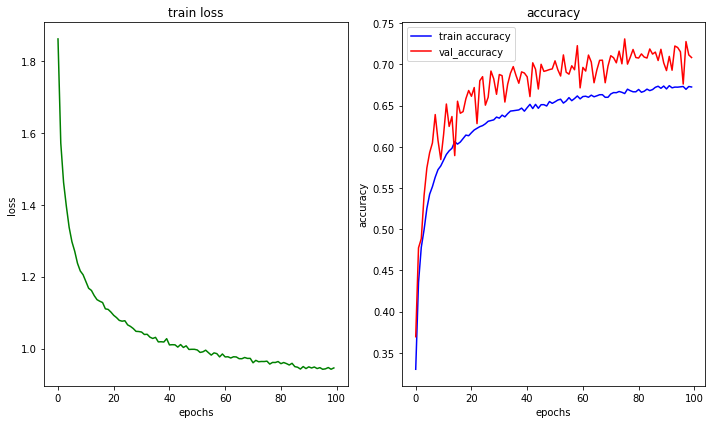

In [7]:
#49_02
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') # (50000, 32, 32, 3)
x_test  = x_test.astype('float32')  # (10000, 32, 32, 3)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3: build a model with functional API
def create_cnn2d(input_shape, num_class = 10):
    inputs = Input(shape=input_shape) #  shape=(32, 32, 3)
    x=Conv2D(filters=16, kernel_size = (3,3), activation='relu')(inputs)
    x=BatchNormalization()(x)
    x=MaxPool2D()(x)

    x=Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
    x=MaxPool2D()(x)
    x=Dropout(rate=0.2)(x)
      
    x=Flatten()(x)
    outputs= Dense(units=num_class, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    
    opt = RMSprop(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn2d(input_shape = x_train.shape[1:])
model.summary()

#4: image augmentation
#4-1:
datagen = ImageDataGenerator( # ref: https://keras.io/ko/preprocessing/image/
    featurewise_center = True,            # mean = 0.0
    featurewise_std_normalization= True,  # std = 1.0
    rotation_range=10,    
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2)

datagen.fit(x_train) #  computes the internal data stats: mean, std, zca
print("datagen.mean = ", datagen.mean)
print("datagen.std = ",  datagen.std)

#4-2: split train into (train, valid): n_valid 
n_valid = 5000
x_valid = x_train[-n_valid:]
y_valid = y_train[-n_valid:]
x_train = x_train[:-n_valid]
y_train = y_train[:-n_valid]

#4-3: ref: https://www.tensorflow.org/guide/keras/custom_callback
class MyCustomCallback(tf.keras.callbacks.Callback):           
    def on_train_batch_end(self, batch, logs=None):
        print("batch {} ends, loss:{:.2f}, acc:{:.2f}".format(
            batch, logs['loss'],  logs['accuracy']))   

#5: train the model using generator
datagen.standardize(x_valid) # normalize x_valid, the same as datagen
train_generator= datagen.flow(x=x_train, y=y_train , batch_size=400)
train_steps= int(np.ceil(train_generator.n/train_generator.batch_size))
print("train_steps=", train_steps) # 113

ret = model.fit(train_generator, epochs=100,
                validation_data=(x_valid, y_valid), verbose=1,
                steps_per_epoch= train_steps) 
                ##,callbacks=[MyCustomCallback()])

#6:  predict and evaluate the model
#6-1: normalize x_train, x_test, the same as datagen
datagen.standardize(x_train) # mean=0, std=1
datagen.standardize(x_test)  # mean=0, std=1

#6-2: calculate confusion_matrix(C)
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
##print("confusion_matrix(C):", C)

#6-3: evaluate
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#7: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val_accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


In [ ]:
#49_03
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') # (50000, 32, 32, 3)
x_test  = x_test.astype('float32')  # (10000, 32, 32, 3)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3: build a model with functional API
def create_cnn2d(input_shape, num_class = 10):
    inputs = Input(shape=input_shape) #  shape=(32, 32, 3)
    x=Conv2D(filters=16, kernel_size = (3,3), activation='relu')(inputs)
    x=BatchNormalization()(x)
    x=MaxPool2D()(x)

    x=Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
    x=MaxPool2D()(x)
    x=Dropout(rate=0.2)(x)
      
    x=Flatten()(x)
    outputs= Dense(units=num_class, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    
    opt = RMSprop(learning_rate=0.001) #  0.002
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn2d(input_shape = x_train.shape[1:])
##model.summary()

#4: image augmentation
datagen = ImageDataGenerator( # ref: https://keras.io/ko/preprocessing/image/
    featurewise_center = True,            # mean = 0.0
    featurewise_std_normalization= True,  # std = 1.0
    rotation_range=10,    
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    validation_split=0.2)

datagen.fit(x_train) #  computes the internal data stats: mean, std, zca
print("datagen.mean = ", datagen.mean)
print("datagen.mean = ",  datagen.std)

train_generator= datagen.flow(x=x_train, y=y_train, batch_size=400, subset='training')
valid_generator= datagen.flow(x=x_train, y=y_train, batch_size=400, subset='validation')

train_steps= int(np.ceil(train_generator.n/train_generator.batch_size))
valid_steps= int(np.ceil(valid_generator.n/valid_generator.batch_size))
print("train_steps=", train_steps)
print("valid_steps=", valid_steps)

#5: train the model using generator
ret = model.fit(train_generator, epochs=100,
                validation_data=valid_generator,
                steps_per_epoch= train_steps,
                validation_steps=valid_steps,
                verbose=2)

#6:  predict and evaluate the model
#6-1: normalize x_train, x_test, the same as datagen
datagen.standardize(x_train) # mean=0, std=1
datagen.standardize(x_test)  # mean=0, std=1

#6-2: calculate confusion_matrix(C)
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

#6-3: evaluate
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,    y_test, verbose=2)

#7: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val_accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


In [ ]:
#49_04
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar100.load_data() # 'fine'
x_train = x_train.astype('float32') # (50000, 32, 32, 3)
x_test  = x_test.astype('float32')  # (10000, 32, 32, 3)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3: build a model with functional API
def create_cnn2d(input_shape, num_class = 100):
    inputs = Input(shape=input_shape) #  shape=(32, 32, 3)
    x= Conv2D(filters=16, kernel_size = (3,3), padding='same',
              activation='relu', )(inputs)
    x= BatchNormalization()(x)
    x= MaxPool2D()(x)
    
    x= Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
    x= BatchNormalization()(x)
    x= MaxPool2D()(x)
    x= Dropout(rate=0.25)(x)

    x= Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
    x= BatchNormalization()(x)
    x= MaxPool2D()(x)
    x= Dropout(rate=0.5)(x)
      
    x=Flatten()(x)
    
    x = Dense(units=256, activation='relu')(x)
    x= Dropout(rate=0.2)(x)
    outputs = Dense(units=num_class, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)

    opt = RMSprop(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])    
    return model
model = create_cnn2d(input_shape = x_train.shape[1:])
##model.summary()

#4: image augmentation
datagen = ImageDataGenerator( # ref: https://keras.io/ko/preprocessing/image/
    featurewise_center = True,            # mean = 0.0
    featurewise_std_normalization= True,  # std = 1.0
    rotation_range=20,    
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    validation_split=0.2)

datagen.fit(x_train) #  computes the internal data stats: mean, std, zca
##print("datagen.mean = ", datagen.mean)
##print("datagen.mean = ",  datagen.std)

train_generator= datagen.flow(x=x_train, y=y_train, batch_size=400, subset='training')
valid_generator= datagen.flow(x=x_train, y=y_train, batch_size=400, subset='validation')

train_steps= int(np.ceil(train_generator.n/train_generator.batch_size))
valid_steps= int(np.ceil(valid_generator.n/valid_generator.batch_size))
print("train_steps=", train_steps)
print("valid_steps=", valid_steps)

#5: train the model using generator
ret = model.fit(train_generator, epochs=100,
                validation_data=valid_generator,
                steps_per_epoch= train_steps,
                validation_steps=valid_steps,
                verbose=0)

#6:  predict and evaluate the model
#6-1: normalize x_train, x_test, the same as datagen
datagen.standardize(x_train) # mean=0, std=1
datagen.standardize(x_test)  # mean=0, std=1

#6-2: calculate confusion_matrix(C)
##y_pred = model.predict(x_train)
##y_label = np.argmax(y_pred, axis = 1)
##C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
##print("confusion_matrix(C):", C)

#6-3: evaluate
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#7: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val_accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


In [ ]:
#49_05
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout
from tensorflow.keras.layers   import Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16

import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar100.load_data() # 'fine'
x_train = x_train.astype('float32') # (50000, 32, 32, 3)
x_test  = x_test.astype('float32')  # (10000, 32, 32, 3)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test  = tf.keras.utils.to_categorical(y_test)

# preprocessing, 'caffe', x_train, x_test: BGR
x_train = preprocess_input(x_train)
x_test  = preprocess_input(x_test)

#3: build VGG modelfor CIFAR-100
#3-1: resize_layer
inputs = Input(shape=(32, 32, 3))
resize_layer = tf.keras.layers.Lambda( 
                             lambda img: tf.image.resize(img,(224, 224)))(inputs) 

#3-2:
vgg_model = VGG16(weights='imagenet', include_top= False, 
                     input_tensor= resize_layer) # input_tensor= inputs
vgg_model.trainable=False
                      
#3-3: output: classification
x = vgg_model.output
##x = Flatten()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(rate=0.5)(x)
outs  = Dense(100, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outs)
##model.summary()

#4: image augmentation
datagen = ImageDataGenerator( # ref: https://keras.io/ko/preprocessing/image/
    rotation_range=10,    
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    validation_split=0.2)

train_generator= datagen.flow(x=x_train, y=y_train, batch_size=16, subset='training')
valid_generator= datagen.flow(x=x_train, y=y_train, batch_size=16, subset='validation')

train_steps= int(np.ceil(train_generator.n/train_generator.batch_size))
valid_steps= int(np.ceil(valid_generator.n/valid_generator.batch_size))
print("train_steps=", train_steps)
print("valid_steps=", valid_steps)

#5: train the model using generator
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(train_generator, epochs=30,
                validation_data=valid_generator,
                steps_per_epoch= train_steps,
                validation_steps= valid_steps,
                verbose=0)

#6:  predict and evaluate the model
#6-1: calculate confusion_matrix(C)
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
##print("confusion_matrix(C):", C)

#6-3: evaluate
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc   = model.evaluate(x_test,  y_test, verbose=2)

#7: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val_accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


In [ ]:
_URL= "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

In [ ]:
#50_01
#_URL= "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
#path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
#ref: https://www.tensorflow.org/tutorials/images/classification
import tensorflow as tf
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)


#2: build a model with functional API
def create_cnn2d(input_shape=(224, 224, 3), num_class = 2):
    inputs = Input(shape=input_shape)
    x=Conv2D(filters=16, kernel_size = (3,3), activation='relu')(inputs)
    x=BatchNormalization()(x)
    x=MaxPool2D()(x)

    x=Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
    x=MaxPool2D()(x)
    x=Dropout(rate=0.5)(x)
      
    x=Flatten()(x)
    x= Dense(units=256, activation='relu')(x)
    x= Dropout(rate=0.5)(x)
    outputs= Dense(units=num_class, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    
    opt = RMSprop(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_cnn2d()
##model.summary()

#3: image augmentation
#3-1:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=20,    
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale= 1./255)

#3-2:
img_width, img_height = 224, 224
#train_dir= "C:/Users/user/.keras/datasets/cats_and_dogs_filtered/train"
#test_dir = "C:/Users/user/.keras/datasets/cats_and_dogs_filtered/validation"
train_dir= "/content/drive/MyDrive/cats_and_dogs_filtered/train"
test_dir = "/content/drive/MyDrive/cats_and_dogs_filtered/validation"
train_generator= train_datagen.flow_from_directory(
    train_dir, target_size=(img_width, img_height), batch_size=32,
    class_mode="categorical", subset='training')
valid_generator= train_datagen.flow_from_directory(
    train_dir, target_size=(img_width, img_height), batch_size=32,
    class_mode="categorical", subset='validation')

test_generator= test_datagen.flow_from_directory(
    test_dir, target_size=(img_width, img_height), batch_size=32,
    class_mode="categorical")

print("train_generator.class_indices=", train_generator.class_indices)
print("test_generator.class_indices=", test_generator.class_indices)

print("train_generator.classes.shape=", train_generator.classes.shape)
print("valid_generator.classes.shape=", valid_generator.classes.shape)
print("test_generator.classes.shape=",  test_generator.classes.shape)

train_steps= int(np.ceil(train_generator.classes.shape[0]/train_generator.batch_size))
valid_steps= int(np.ceil(valid_generator.classes.shape[0]/valid_generator.batch_size))
test_steps= int(np.ceil(test_generator.classes.shape[0]/test_generator.batch_size))
print("train_steps=",train_steps)
print("valid_steps=",valid_steps)
print("test_steps=",test_steps)

#4: train the model using generator
ret = model.fit(train_generator, epochs=100,  
                validation_data=valid_generator,
                steps_per_epoch= train_steps,
                validation_steps=valid_steps,
                verbose=2)

#5:  
#5-1: calculate confusion_matrix(C)
y_pred = model.predict(train_generator, steps=train_steps, verbose=2)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(train_generator.labels, y_label)
print("confusion_matrix(C):", C)

#5-2: evaluate
train_loss, train_acc = model.evaluate(train_generator,
                                       steps = train_steps,
                                       verbose=2)
test_loss, test_acc = model.evaluate(test_generator,
                                     steps = test_steps,
                                     verbose=2)

#6: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val_accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()
